<a href="https://colab.research.google.com/github/dxcim/Business-Analytics-Foundations/blob/main/rooster_a13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Module 4 | Pattern discovery**

`rooster_a13.ipynb` | 2025-03-27 17:12

# Rooster products

# Rooster products

In this notebook, we'll explore the Rooster products data.

Subsections:

* [Orders by state](#orders-by-state)
* [Orders by product range and colour](#orders-by-product-range-and-colour)
* [Effect of discount on order value](#effect-of-discount-on-order-value)
* [Data cleaning](#data-cleaning)

For each **Analysis task**, write code to do the task in the code cell provided.

For each **Reporting task**, write your brief answer in the same cell as the question.

## How to use this notebook


To run this notebook in Colab, choose **Runtime** from the top menu and then **Run all**. This will set up the notebook and then run all the cells.

The first run may take a few minutes to install the required libraries and download the data. Subsequent runs will be faster.

You can also run the cells one by one using the play button next to each cell.

---

This section of the notebook contains code to set up the notebook environment. It installs the required libraries, downloads the data, and sets the display style for charts.

After this section of the notebook runs successfully, you can hide the cells in this section. To do this in Colab, choose **View** from the top menu, then **Collapse sections**, or click the downward chevron ⌄ next to the section title.

You do not need to understand the code in the "How to use this notebook" section to follow the rest of the notebook.


In [1]:
# install ydata_profiling
# if prompted by Colab, restart the runtime after installing: Runtime -> Restart session

%pip install --quiet ydata_profiling==4.12.2

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 14.4 MB/s eta 0:00:00


In [2]:
# download data

from urllib.request import urlretrieve
from pathlib import Path

if not Path("/content/rooster_a13.xlsx").exists():
    urlretrieve("https://canvas.uts.edu.au/files/8982275/download?download_frd=1&verifier=nE9do0skoAryr3k687gDk5A0m5IhdimLqfMHQZrJ", "rooster_a13.xlsx")

In [3]:
# format figures for display in Canvas

import seaborn as sns

sns.set_theme(style="white", rc={"figure.figsize": (12, 6)})
sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})

# in Colab, if this cell fails with
# "ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject"
# first try restarting the runtime.
# To restart the runtime, use the menu: Runtime menu -> Restart runtime
# or use the keyboard shortcut Ctrl-M then . (period) and confirm. Mac: ⌘-M then . (period).
# Then re-run this cell.

## Load the data

We will load the data from each sheet of the source file into a separate dataframe.

In [4]:
import pandas as pd

products = pd.read_excel("/content/rooster_a13.xlsx", sheet_name="products")
orders = pd.read_excel("/content/rooster_a13.xlsx", sheet_name="orders")
orderlines = pd.read_excel("/content/rooster_a13.xlsx", sheet_name="orderlines")
customers = pd.read_excel("/content/rooster_a13.xlsx", sheet_name="customers")

## Orders by state

> [!activity] Analysis task
>
> How many orders are there for each state?

In [5]:
# write your code here

> [!activity] Analysis task
>
> What is the average order total by state?

In [6]:
# write your code here

Let's show the number of orders and the median order value side by side.

In [7]:
# order count and median order_total by state

orders.groupby("state").agg({"order_total": ["count", "median"]})

order_total        
            count  median
state                    
ACT           217  42.400
NSW          1578  44.280
NT            208  41.725
QLD           283  44.450
SA            163  42.400
TAS           217  44.200
VIC           201  43.450
WA            416  43.450

> [!activity] Analysis task
>
> Find the number of orders and average order total by state.

In [8]:
# write your code here

> [!activity] Reporting task
>
> What insights, if any, do you see by comparing the mean and median order values?

### Visualising the distribution of order value


> [!activity] Analysis task
>
> Make a histogram of order value for all states.

In [9]:
# write your code here

We'll make histograms of order value for each state on the same visualisation, so that you can compare them.

Comparing 8 histograms at once will always be a challenge. Let's try a few ways to do it.

Seaborn's distribution plot function `displot` gives you several options for combining multiple histograms in one chart. [sns.displot documentation](https://seaborn.pydata.org/tutorial/distributions.html#conditioning-on-other-variables)

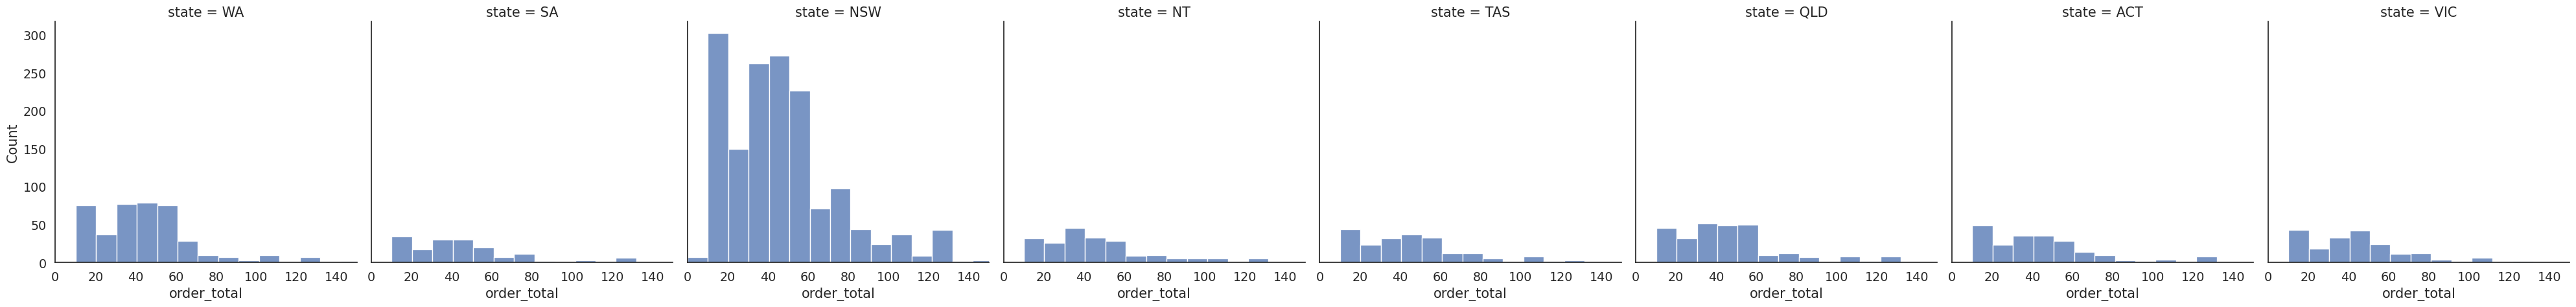

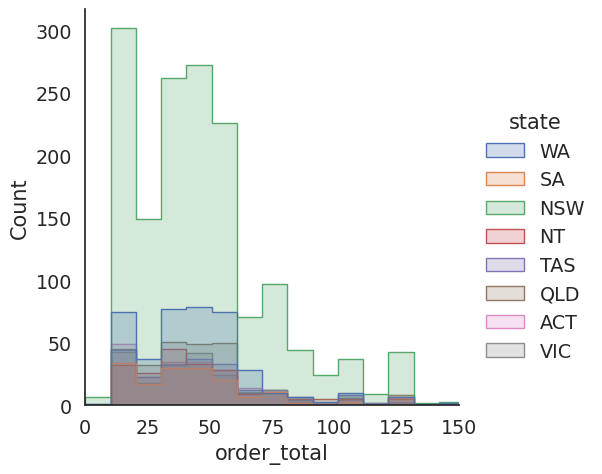

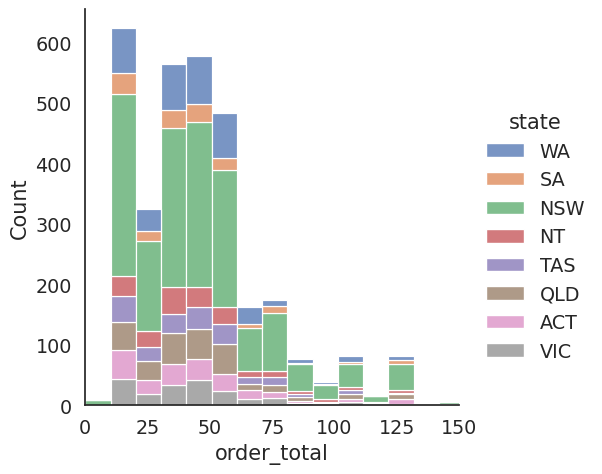

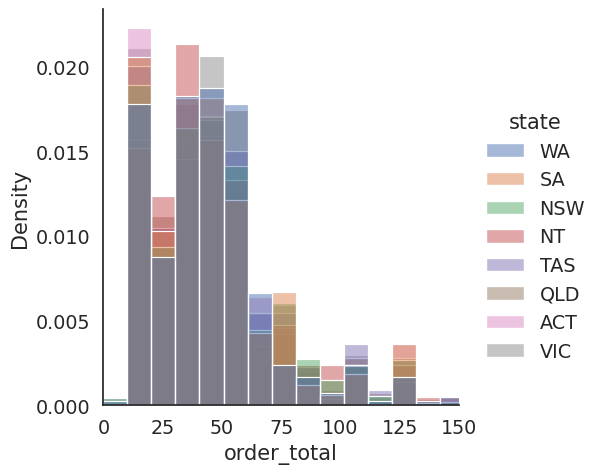

In [10]:
# separate histograms of order_total by state
# https://seaborn.pydata.org/tutorial/distributions.html#conditioning-on-other-variables

# number of bins for all histograms
bins = 30

# x-axis limit for all histograms
xlim = (0, 150)

# separate histograms, panelled
sns.displot(data=orders, x="order_total", col="state", bins=bins).set(xlim=xlim)

# overlaid histograms, stepped
sns.displot(orders, x="order_total", hue="state", element="step", bins=bins).set(xlim=xlim)

# combined histogram, stacked
sns.displot(orders, x="order_total", hue="state", multiple="stack", bins=bins).set(xlim=xlim)

# combined histogram, each state scaled by the number of orders for that state
sns.displot(orders, x="order_total", hue="state", stat="density", common_norm=False, bins=bins).set(xlim=xlim)


> [!activity] Reporting task
>
> Which of these 4 alternatives is the most useful if you want to compare the distribution of total order value for the different states?

## Orders by product range and colour

We want to find the typical order value and count of orders, for each product range and colour.

Since order value and range/colour are in different dataframes, we first need to make a single flattened dataframe. Then we can use aggregation to change the unit of analysis to "range" or "colour".

### Denormalising (flattening) the data

We need to merge the orderlines data with the products data, and then merge that with the orders data.

First, we'll merge the orderlines data with the products data. The orderlines data has a `product_id` and `variation_id`, which we can use to join with the products data.

In [11]:
# merge orderlines with products on product_id and variation_id

orderlines_products = pd.merge(orderlines, products, on=["product_id", "variation_id"])

# show the first few rows of orderlines_products

cols = ["order_number", "product_id", "variation_id", "line_id", "range", "colour"]
orderlines_products[cols].head()

,order_number,product_id,variation_id,line_id,range,colour
0,order_66afc259,prod_3e9e39fe,var_356dc406,1,Underwear for Adam,Blue
1,order_66afc259,prod_04600eed,var_964d180e,2,Underwear for Eve,Black
2,order_a90d826c,prod_7610db9e,var_cd3e48b4,1,Underwear for Eve,White
3,order_8cb9014a,prod_ad067202,var_482b31ee,1,Underwear for Adam,White
4,order_c802efb9,prod_6f2268bd,NaN,1,Value pack,Custom


If each orderline is for exactly one product, the number of rows in the `orderlines_products` data should be the same as the number of rows in the `orderlines` data. Let's check this.

In [12]:
# row counts for orderlines and products

print(f"Count of orderlines: {len(orderlines)}")
print(f"Count of products: {len(products)}")
print(f"Count of orderlines_products: {len(orderlines_products)}")

Count of orderlines: 9093
Count of products: 226
Count of orderlines_products: 9093


> [!activity] Analysis task
>
> Merge the `orders` data with the `orderlines_products` data.
> The `orders` data has an `order_number`, which you can use to join with the `orderlines_products` data.

In [18]:
orders_orderlines_products = pd.merge(orders, orderlines_products, on="order_number")
orders_orderlines_products.head()

,order_number,payment_method_title,cart_discount,order_subtotal,shipping_method_title,order_shipping,order_refund,order_total,order_total_tax,coupon_code,...,range,product_type,category,product_name_main,product_name,size,sku_y,price,type,colour
0,order_66afc259,Online payment,4.520325,45.20,Pick-up Point,2.36,0,52.94,9.89,kktky10,...,Underwear for Adam,Briefs,"Underwear for Adams of 21st century, 1 Pack",Rooster Briefs Jonah's Whale Blue,Rooster Briefs Jonah's Whale Blue - M,M,sku_90146ca1,16.9,variation,Blue
1,order_66afc259,Online payment,4.520325,45.20,Pick-up Point,2.36,0,52.94,9.89,kktky10,...,Underwear for Eve,Thong,"Underwear for Eves of 21st century,Thong",Chickadee Eve's Fig Black Thong,Chickadee Eve's Fig Black Thong - L,L,sku_a69bc7d3,12.9,variation,Black
2,order_a90d826c,Online payment,0.000000,10.49,Pick-up Point,2.36,0,15.80,2.95,NaN,...,Underwear for Eve,Thong,"Underwear for Eves of 21st century,Thong",Chickadee Angel's Feather White Thong,Chickadee Angel's Feather White Thong - S,S,sku_5ded8baf,12.9,variation,White
3,order_8cb9014a,Online payment,0.000000,13.74,Pick-up Point,2.36,0,19.80,3.70,NaN,...,Underwear for Adam,Briefs,"Underwear for Adams of 21st century, 1 Pack",Rooster Briefs Adam's Rib White,Rooster Briefs Adam's Rib White - M,M,sku_a7503a60,16.9,variation,White
4,order_c802efb9,Online payment,0.000000,51.71,Pick-up Point,2.36,0,66.50,12.43,NaN,...,Value pack,Briefs,"4 Pack,Build your pack",Rooster Trunks / Briefs (custom color selectio...,Rooster Trunks / Briefs (custom color selectio...,NaN,sku_e0899a6c,63.6,woosb,Custom


> [!activity] Analysis task
>
> Find the number of rows in your `orders`, `orderlines_products`, and `orders_orderlines_products` dataframes.

In [21]:
print("Length of 'orders' df =" , len(orders))
print("Length of 'orderlines_products' df =" , len(orderlines_products))
print("Length of 'orders_orderlines_products' df =" , len(orders_orderlines_products))

Length of 'orders' df = 3283
Length of 'orderlines_products' df = 9093
Length of 'orders_orderlines_products' df = 9093


> [!activity] Reporting task
>
> If each row of `orderlines_products` matches exactly one order, should the number of rows in the `orders_orderlines_products` data be the same as the number of rows in the `orderlines_products` data? Should it be the same as the number of rows in the `products` data?

### Finding the typical order value by product range and colour

> [!activity] Analysis task
>
> Using your `orders_orderlines_products` dataframe, find the average order value (`order_total`) for each product range (`range`).

In [22]:
average_order_value_by_range = orders_orderlines_products.groupby('range')['order_total'].mean()
average_order_value_by_range

,order_total
range,
Gift voucher,24.126875
Underwear for Adam,64.049988
Underwear for Eve,68.948602
Value pack,70.893848


> [!activity] Analysis task
>
> Using your `orders_orderlines_products` dataframe, find the average order value (`order_total`) for each product colour (`colour`).

In [24]:
average_order_value_by_colour = orders_orderlines_products.groupby('colour')['order_total'].mean()
average_order_value_by_colour

,order_total
colour,
Black,59.162100
Blue,63.215306
Custom,76.732332
Green,71.051567
Pink,68.996272
Purple,77.722548
Red,64.771025
White,68.659615


So we can find out about range and colour at the same time, let's show them on the same table.

In [19]:
# mean order_total and count of orders by product range and colour

orders_orderlines_products.groupby(["range", "colour"])["order_total"].agg(["mean", "count"])

mean  count
range              colour                  
Underwear for Adam Black   57.888750   2040
                   Blue    63.084467   1361
                   Green   71.004901    808
                   Purple  77.754601    363
                   Red     64.767462   1261
                   White   68.139039    583
Underwear for Eve  Black   63.040723    429
                   Custom  84.255032    155
                   Pink    68.996272    228
                   White   69.689363    204
Value pack         Black   61.115460    478
                   Blue    67.172444     45
                   Custom  75.621838   1050
                   Green   73.565333     15
                   Purple  71.905000      2
                   Red     64.895833     36
                   White   73.576842     19

> [!activity] Analysis task
>
> Show the mean and median order value, and order volume, for the each colour in each product range.

In [25]:
orders_orderlines_products.groupby(["range", "colour"])["order_total"].agg(["mean", "median", "count"])

mean  median  count
range              colour                          
Underwear for Adam Black   57.888750  50.600   2040
                   Blue    63.084467  53.420   1361
                   Green   71.004901  58.000    808
                   Purple  77.754601  60.140    363
                   Red     64.767462  55.200   1261
                   White   68.139039  57.000    583
Underwear for Eve  Black   63.040723  46.760    429
                   Custom  84.255032  54.500    155
                   Pink    68.996272  49.100    228
                   White   69.689363  48.400    204
Value pack         Black   61.115460  51.200    478
                   Blue    67.172444  52.600     45
                   Custom  75.621838  59.410   1050
                   Green   73.565333  79.400     15
                   Purple  71.905000  71.905      2
                   Red     64.895833  51.600     36
                   White   73.576842  59.000     19

> [!activity] Reporting task
>
> How many orders are there in the entire dataset? That is, how many rows are there in the `orders` dataframe?
> What do you notice about the totals in the `count` column? Can you explain why this is?

## Effect of discount on order value

### Discount amount and discount percent

To look for a relationship between discount amount and order value, we need to calculate the discount percent for each order.

Otherwise, all we will find out is that orders with higher values have higher discount amounts. Of course they do: you can't get a 100-dollar discount on a 50-dollar order.

Discount amount is in the `discount_amount` column. Let's try dividing `discount_amount` by `order_total`.

In [26]:
# add discount_percent to the orders data
# be careful: this code works but it divides by order_total, not order_subtotal

orders["discount_percent"] = orders["discount_amount"] / orders["order_total"]

# summary stats for discount amount, discount percent, and order total

orders[["discount_amount", "discount_percent", "order_total"]].describe()

,discount_amount,discount_percent,order_total
count,1042.000000,1042.000000,3283.000000
mean,5.127860,inf,48.633686
std,8.285565,NaN,31.844493
min,0.570000,0.032920,0.000000
25%,1.980000,0.041510,21.400000
50%,3.220000,0.102919,43.450000
75%,5.960000,0.137164,58.000000
max,208.330000,inf,304.200000


This doesn't look right! The highest possible discount percentage should be 1.0, or 100%.

The discount percent is the discount amount divided by the _order subtotal_. We need to use the order subtotal, not the order total, because order total is after the discount has been applied.


> [!activity] Analysis task
>
> Calculate the percentage discount for each order using `order_subtotal`.
> Show summary statistics for discount amount, discount percent, and order subtotal.

In [39]:
orders["discount_percent"] = orders["discount_amount"] / orders["order_subtotal"]

Get summary statistics for the discount amount, discount percent, and order subtotal.

In [40]:
orders[["discount_amount", "discount_percent", "order_subtotal"]].describe()

,discount_amount,discount_percent,order_subtotal
count,1042.000000,1042.000000,3283.000000
mean,5.127860,0.108578,41.034401
std,8.285565,0.095336,28.961009
min,0.570000,0.049223,8.330000
25%,1.980000,0.049895,16.900000
50%,3.220000,0.100000,39.750000
75%,5.960000,0.149936,47.700000
max,208.330000,1.000000,253.500000


In [41]:
1042/3283

0.31739262869326834

> [!activity] Reporting task
>
> How many orders got a discount? What is the median discount percentage, for orders that got a discount?
> If an order did not receive a discount, what should its discount percentage be?

### Filling in missing discount percent values

The values for `discount_percent` in the summary table above only consider orders that received a discount.

Let's fill in the missing discount percent values with 0, and then get the summary statistics again.

In [42]:
# fill missing discount_percent values with 0

orders["discount_percent"].fillna(0, inplace=True)
orders[["discount_amount", "discount_percent", "order_subtotal"]].describe()

<ipython-input-42-6303891ba88e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders["discount_percent"].fillna(0, inplace=True)


,discount_amount,discount_percent,order_subtotal
count,1042.000000,3283.000000,3283.000000
mean,5.127860,0.034462,41.034401
std,8.285565,0.073742,28.961009
min,0.570000,0.000000,8.330000
25%,1.980000,0.000000,16.900000
50%,3.220000,0.000000,39.750000
75%,5.960000,0.049811,47.700000
max,208.330000,1.000000,253.500000


> [!activity] Reporting task
>
> What is the median discount percent for orders overall?

### Correlation between discount amount and order subtotal

We will first make a heatmap showing the correlations between all the numeric variables in the `orders` dataframe.

<Axes: >

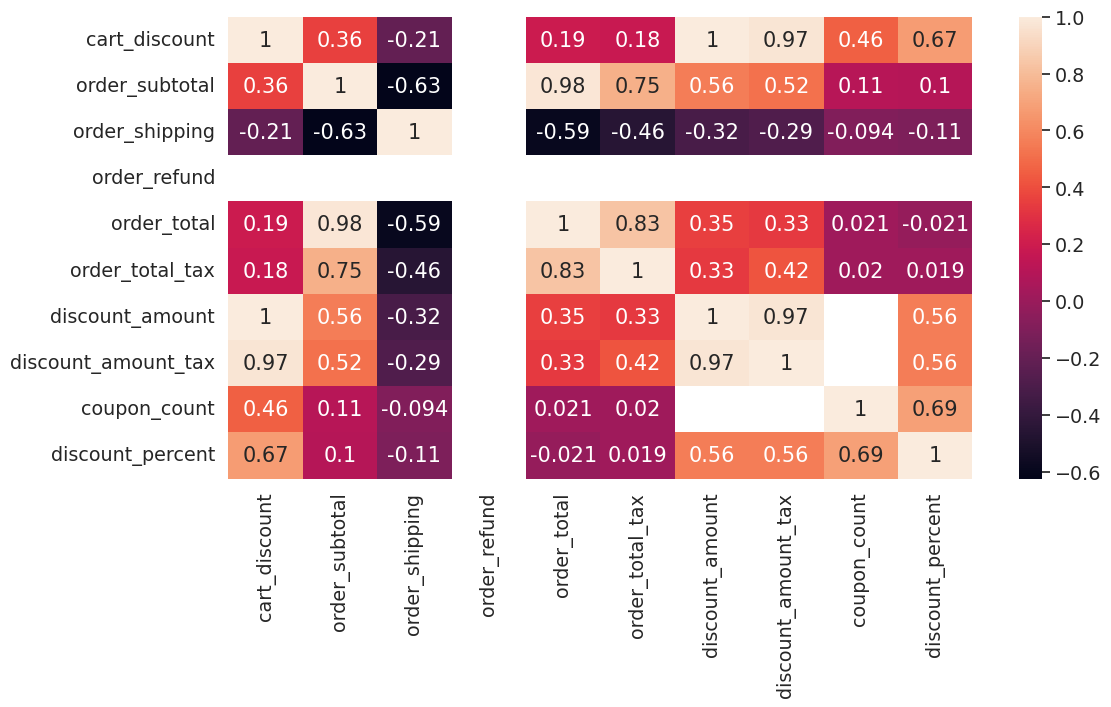

In [43]:
# seaborn table of correlations for all numeric columns

sns.heatmap(orders.corr(numeric_only=True), annot=True)

> [!activity] Reporting task
>
> Which variables are closely related to order subtotal? If Rooster wants to increase average order value, which of these relationships (if any) would you explore further?

In [44]:
# correlation between discount_percent and order_subtotal

r = orders["discount_percent"].corr(orders["order_subtotal"])
print(f"Correlation between discount_percent and order_subtotal: {r:.2f}")

Correlation between discount_percent and order_subtotal: 0.10


> [!activity] Reporting task
>
> Describe the strength and direction of the relationship between discount percent and order subtotal.

> [!activity] Analysis task
>
> Show the relationship between discount percent and order subtotal with a scatter plot.
> [sns.scatterplot documentation](https://seaborn.pydata.org/tutorial/relational.html#relating-variables-with-scatter-plots)

In [ ]:
# write your code here

We know the relationship is quite weak, so there's not much to see in the scatterplot. But it's even harder to see if there are a few orders with very high discount percentages (outliers).

Let's filter out orders with a discount percent over 0.2 and then plot the scatterplot again. We could also use `regplot`, which is a `scatterplot` that includes a regression line. [sns.regplot documentation](https://seaborn.pydata.org/tutorial/regression.html)

<Axes: xlabel='discount_percent', ylabel='order_subtotal'>

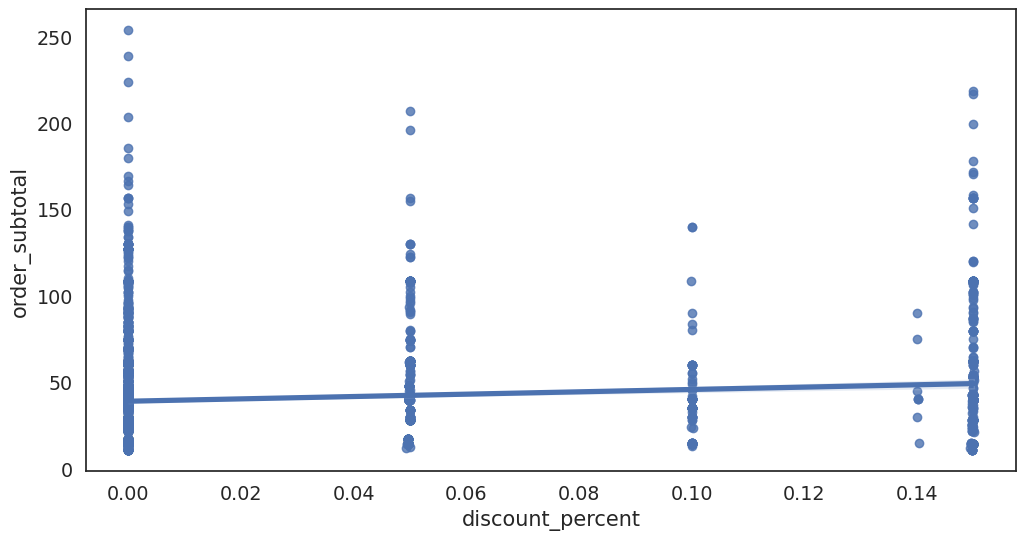

In [45]:
# regplot of discount_percent and order_subtotal
# https://seaborn.pydata.org/tutorial/regression.html

# filter out orders with a discount_percent over 0.2
orders_filtered = orders[orders["discount_percent"] <= 0.2]

# plot with regression line
sns.regplot(data=orders_filtered, x="discount_percent", y="order_subtotal")

## Data quality

We will use ydata-profiling to assess the quality of the data in `orders`.

In [ ]:
# run ydata_profiling on orders data

from ydata_profiling import ProfileReport

profile = ProfileReport(orders, title="Orders data profiling report", progress_bar=False)
profile.to_file("rooster_a13_original.html")
profile.to_notebook_iframe()

### Data quality issues

Look through the data quality issues in the profiling report.

> [!activity] Reporting task
>
> 1. Discount amount is often missing. Do you know why this is? Can you think of a way to fill in the missing values?
> 2. If we wanted to understand the city that most orders come from, could we do it?
> 3. What other issues do you think are important to address, and why?

### Data cleaning

Make a copy of the `orders` dataframe. Call it `orders_clean`. We will clean the data in `orders_clean`.

In [ ]:
# write your code here

We will fill in the missing values for discount amount with 0.

In [ ]:
# fill missing discount_amount values with 0

orders_clean["discount_amount"].fillna(0, inplace=True)

Make a new ydata-profiling report on the cleaned data in `orders_clean`.

In [ ]:
# write your code here

We can use `profile.compare` to make a side-by-side comparison of your two data quality reports.

In [ ]:
# make the comparison report

comparison_report = profile.compare(clean_report)
comparison_report.to_file("rooster_a13_comparison.html")
comparison_report.to_notebook_iframe()

> [!activity] Reporting task
>
> Check the side-by-side report to make sure you have fixed the issue. How do you know the problem is solved?

---
